### Nodal tides

In [2]:
import numpy as np
import pandas as pd

In [3]:
path_slb = '/Users/dewilebars/Projects/SLBudget/outputs/'

In [4]:
# This functions was adapted from a Matlab function provided by Tim on June 16, 2020.
def nodal_tides_potential(lat, years):
    h2 = 0.6032
    k2 = 0.298

    #nodal cycle correction
    A = 0.44*(1+k2-h2)*20*(3*np.sin(lat*np.pi/180.)**2-1)/10  # mm to cm
    nodcyc = A*np.cos((2*np.pi*(years-1922.7))/18.61 + np.pi)
    
    nodcyc_df = pd.DataFrame(data={'Year': years, 'nodcyc': -nodcyc})
    nodcyc_df = nodcyc_df.set_index('Year')
    return nodcyc_df

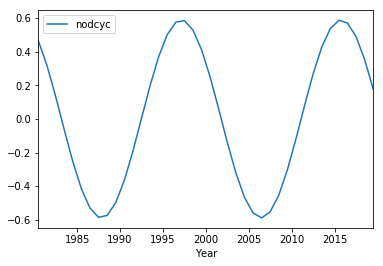

In [6]:
years = np.arange(1980,2020)+0.5
nodal_tides = nodal_tides_potential(54, years)
nodal_tides.plot()

The results seem to be in accordence with Frederikse et al. 2016 Figure 4.

In [7]:
budget_NCEP1_df = pd.read_csv(path_slb+
                        'slbudget_2020_04_28_NS_Fred16_1950_2018_NCEP1.csv')
budget_NCEP1_df = budget_NCEP1_df.set_index('time')

In [8]:
# Compare with nodal cycle computed from the regression method
budget_df = pd.read_csv(path_slb+
                        'slbudget_2020_06_15_ZSM_1979_2018_ERA5.csv')
budget_df = budget_df.set_index('time')

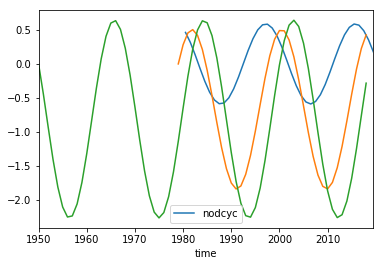

In [9]:
nodal_tides.plot()
budget_df.Nodal.plot(label='regression')
budget_NCEP1_df.Nodal.plot()

The estimation of the nodal tide from a regression doesn't work for this short time series

Is it converging over longer time scales?